In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

### 1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую).


In [2]:
from sklearn import datasets
data = datasets.fetch_california_housing(as_frame=True).frame
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### 2. Проведите первичный анализ.
a.Проверьте данные на пропуски. Удалите в случае обнаружения.


In [3]:
# Пропусков не обнаружено
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


b.*Нормализуйте один из признаков.


In [4]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
# Можно нормализовать популяцию
data.Population.max()

35682.0

In [6]:
# Импортируем библиотечку, делаем преобразования и нормализацию, затем перезаписываем.
from sklearn import preprocessing

population_array = np.array(data['Population'])
population_array = preprocessing.normalize([population_array])

data['Population'] = population_array[0]

In [7]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,0.001231,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,0.009180,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,0.001896,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,0.002133,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,0.002160,2.181467,37.85,-122.25,3.422


### 3. Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.
### 4. Обучите модель регрессии на обучающем множестве.


In [8]:
# Сделем функцию для линейной регрессии с Score внутри
def lr_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [9]:
X = data.loc[:, data.columns[:-1]]
y = data['MedHouseVal']

### 5. Для тестового множества предскажите целевую переменную и сравните с истинным значением, посчитав точность предсказания модели. Для этого используйте встроенную функцию score.


In [10]:
# Вызовем функцию и посмотрим наш Score
lr_model(X, y)

0.6047072598918704

### 6. Обучите дерево решений на обучающем множестве.


In [14]:
# Сделаем функцию для дерева, а также добавим функционал для графика
from sklearn.tree import plot_tree

def Three(X, y, depth=None):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
    model = DecisionTreeRegressor(max_depth=depth, random_state=13)
    model.fit(X_train, y_train)
    
    figure = plt.figure(figsize=(20,12))
    vizaulization = plot_tree(model, feature_names=data.columns, filled=True)
    
    return model.score(X_test, y_test)

a. Повторите п. 5 для полученной модели.

b. Визуализируйте часть дерева решений. Убедитесь, что график получился читабельным. Посмотрите примеры визуализации по ссылке.

0.5398199113158775

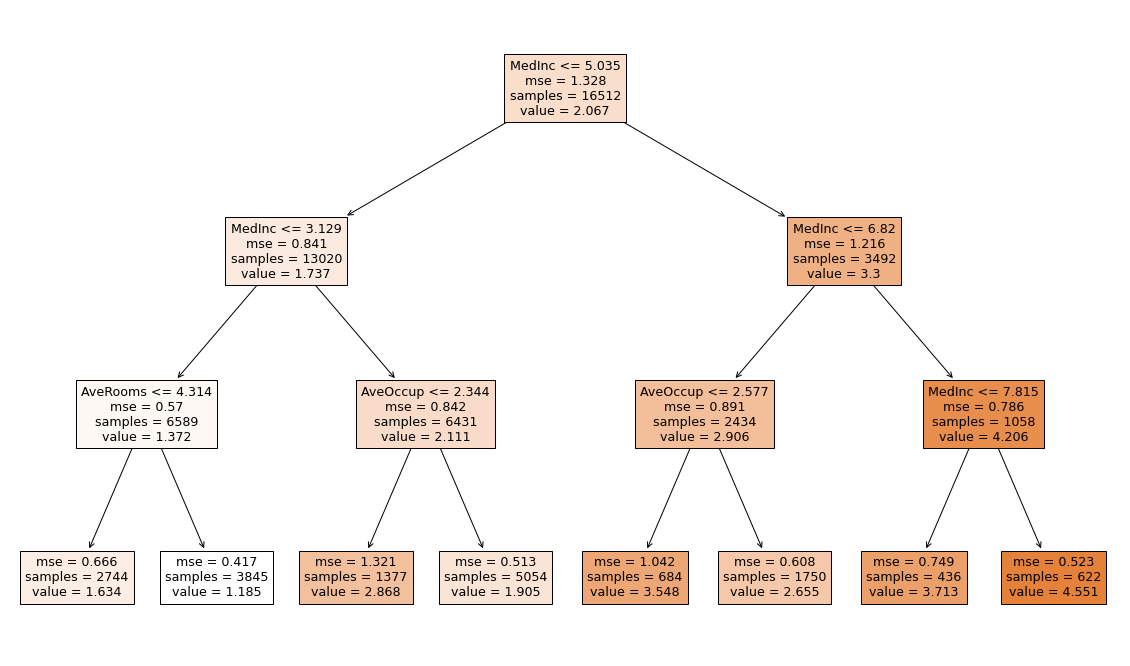

In [82]:
Three(X, y, depth=3)

0.6888407458535624

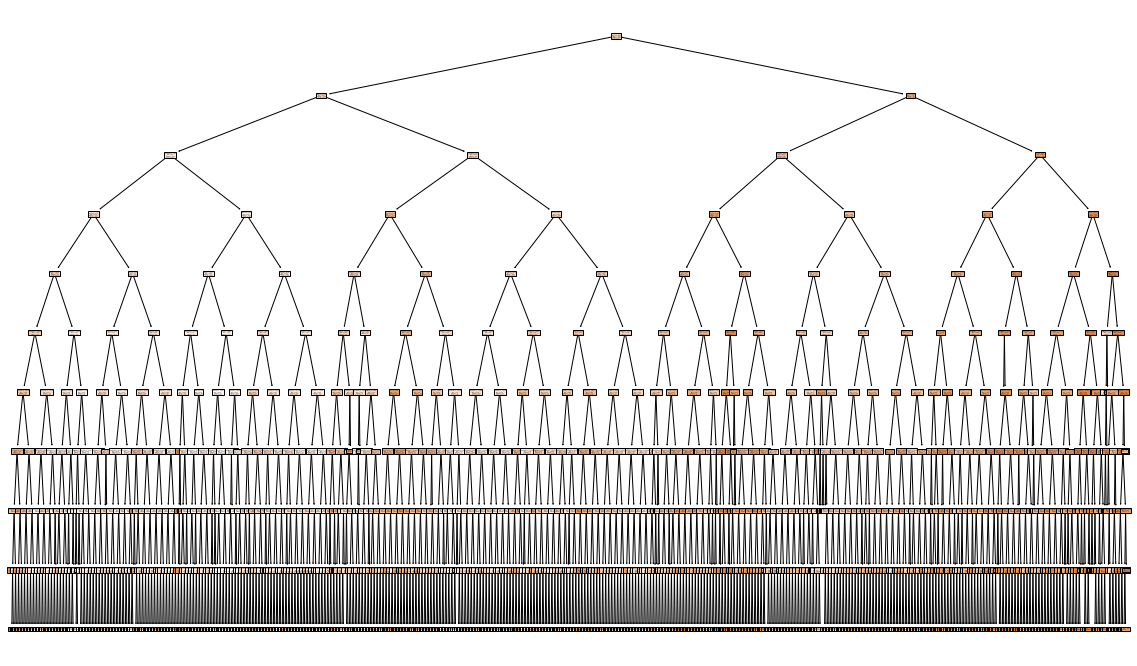

In [17]:
# Вызовем функцию и посмотрим наш Score. (Заметил, что если не установить depth, будем сидеть вечно) По дереву это видно :DD
# Специально оставил этот пример для себя.
Three(X, y, depth=10)

### 7. Оптимизируйте глубину дерева (max_depth). *Оптимизируйте ещё один параметр модели на выбор.


In [77]:
# Изменим нашу функцию из предыдущего раздела для поиска наилучшего варианта глубины
def depth(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
    
    depths = {}
    for el in range (1, 15, 1):
        model = DecisionTreeRegressor(max_depth=el, random_state=13)
        model.fit(X_train, y_train)
        depths[f'depth={el}'] = model.score(X_test, y_test)
    
    print(f'Оптимальная глубина дерева: {max(depths, key=depths.get)}')

In [78]:
depth(X, y)

Оптимальная глубина дерева: depth=11


a. Повторите п. 5 для полученной модели.


In [79]:
# Уберем из функции графики и повторим с depth = 11
def total_Three(X, y, depth=None):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
    model = DecisionTreeRegressor(max_depth=depth, random_state=13)
    model.fit(X_train, y_train)
    
    return model.score(X_test, y_test)

In [81]:
Three_1(X, y, depth=11)

0.6958516121169763

### 8. Сформулируйте выводы по проделанной работе.
a. Сравните точность двух моделей.


In [85]:
print(f'Линейная регрессия - {lr_model(X, y)}')
print(f'Дерево depth=3 - {Three_1(X, y, depth=3)}')
print(f'Дерево depth=11 - {Three_1(X, y, depth=11)}')

Линейная регрессия - 0.6047072598918704
Дерево depth=3 - 0.5398199113158775
Дерево depth=11 - 0.6958516121169763


b. Напишите свое мнение, для каких задач предпочтительнее использовать обученные в работе модели? Какие у них есть плюсы и минусы?

1. В нашей задаче дерево имеет более высокую точность и можно сказат, что подходит нам.
2. Можно смещивать категории и числовые признаки.
3. Проще в подготовке модели, и не нужно особо изучать данные (конечно относительно, но нам было это здесь прощено)
4. Рекурсивное разбиение хорошо справляется, особенно учитывая если мы незнакомы или плохо понимаем наши данные.


#### Очевидный плюс, скорее всего его можно использовать для любых задач и оно будет удовлетворитльно справляться с ними.